# Random Walk #

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc


In [2]:
# De parameters
N=10        # totaal aantal stappen
n1=3        # aantal stappen naar rechts
n2=N-n1     # aantal stappen naar links
p=0.5       # kans voor stap naar rechts
q=1.0-p     # kans voor stap naar links


## 1. Waarschijnlijkheidsverdeling ##

In [3]:
min_n1=-10
max_n1=20
nsteps=max_n1-min_n1+1  #+1 want er is altijd 1 gridpunt meer dan er stappen in een grid zijn
Xcoord=np.linspace(min_n1,max_n1,nsteps) # maak een reeks van n1 waarden gaande van min_n1 tot max_n1

Ycoord=np.zeros(nsteps)
for i in range(nsteps): #bepaal nu de verwachtingswaarde voor elk mogelijk punt
    Ycoord[i]+=sc.binom(N,Xcoord[i])*(p**Xcoord[i])*(q**(N-Xcoord[i]))    # P(n1)=binom(N,n1)* p^n1 * q^n2

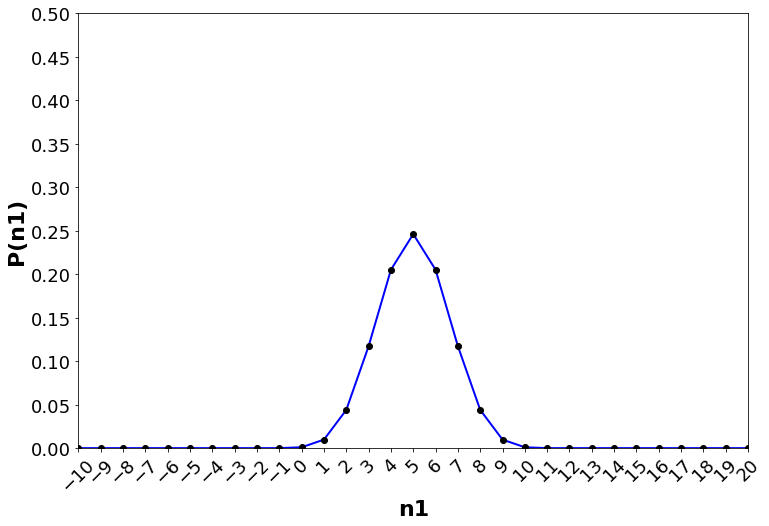

In [4]:
# Mooi plotten
plt.figure(figsize=(12,8))
plt.plot(Xcoord, Ycoord,  color='blue',linewidth=2, zorder=0) # plot de data als lijn
plt.scatter(Xcoord, Ycoord,  color='black', zorder=1)         # plot de data als set onverbonden punten
# Propere opmaak van de assen
plt.axis([min_n1,max_n1,0,0.5])
plt.xticks(Xcoord,rotation=45,fontsize=18)
Ylst=np.linspace(0,0.5,11)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("n1",fontsize=22,fontweight="bold")
plt.ylabel("P(n1)",fontsize=22,fontweight="bold")
# Alles is nu klaar om op te slaan in een file of te plotten (show) op het scherm.
plt.show()

## 2. Evolutie waarschijnlijkheidsverdeling ##
Hoe verandert de waarschijnlijkheidsverdeling bij verandering van N?

In [5]:
min_n1=-10
max_n1=20
nsteps=max_n1-min_n1+1  #+1 want er is altijd 1 gridpunt meer dan er stappen in een grid zijn
Xcoord=np.linspace(min_n1,max_n1,nsteps) # maak een reeks van n1 waarden gaande van min_n1 tot max_n1

min_N=5
max_N=20
numN=max_N-min_N+1
Nlist=np.linspace(min_N,max_N,numN)

Ycoord=np.zeros((numN,nsteps))
for iN in range(numN): #+1: python neemt de bovengrens niet mee
    N=iN+min_N         # iN is de index in de lijst, begint bij 0, N is dan de echte "N-waarde"
    # Voor elke N genereren we nu een curve zoals voorheen.
    for i in range(nsteps):
        Ycoord[iN,i]+=sc.binom(N,Xcoord[i])*(p**Xcoord[i])*(q**(N-Xcoord[i]))

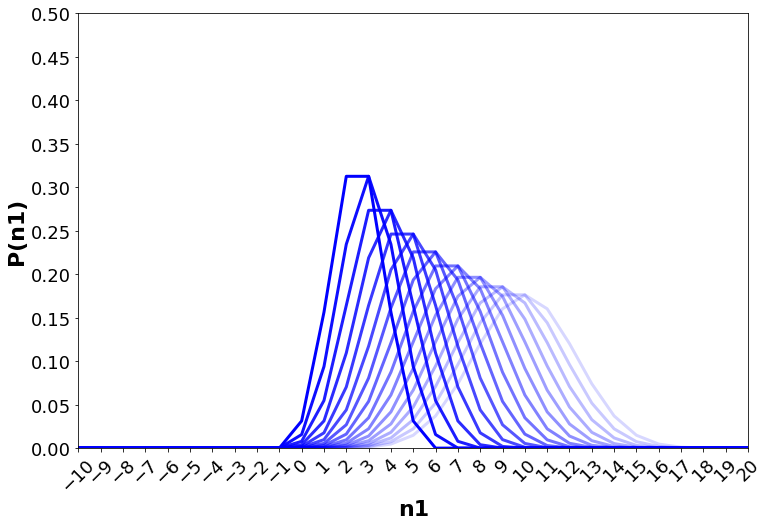

In [6]:
# Opnieuw alles mooi plotten
plt.figure(figsize=(12,8))
for iN in range(numN): #een lus over de verschillende curves
    Yc=Ycoord[iN]
    plt.plot(Xcoord, Yc,   color='blue'  ,linewidth=3, zorder=-1, alpha=(1.0-0.9*(iN/numN))) 
    # door met de alpha-waarde (transparantie) te spelen kunnen we een reeks curves met verschillende kleur genereren.
# De opmaak van de assen
plt.axis([min_n1,max_n1,0,0.5])
plt.xticks(Xcoord,rotation=45,fontsize=18)
Ylst=np.linspace(0,0.5,11)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("n1",fontsize=22,fontweight="bold")
plt.ylabel("P(n1)",fontsize=22,fontweight="bold")
# Tonen op het scherm
plt.show()

## 3. Stap evolutie ##

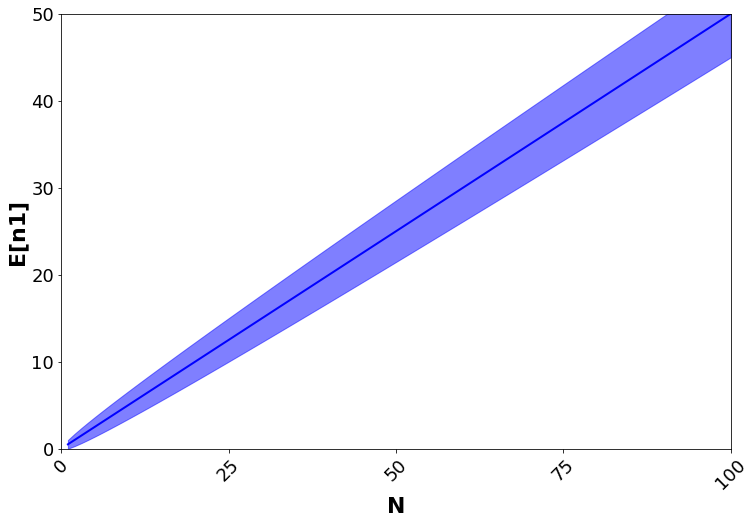

In [7]:
# Alles in 1 enkele cel
#------------------------

#1. parameters opnieuw instellen
min_N=1   # minimaal aantal stappen
max_N=100 # maximaal aantal stappen
numN=max_N-min_N+1 # aantal stappen
p=0.5     # kans stap rechts
q=1.0-p   # kans stap links

#2. curves bepalen
Ncoord=np.linspace(min_N,max_N,numN)
E_n1=np.zeros(numN)     # gemiddelde n1 (of expectation value)
Var_n1=np.zeros(numN)   # variantie n1  (aka sigma-kwadraat)
for iN in range(numN):
    N=iN+min_N
    E_n1[iN]=N*p
    Var_n1[iN]=N*p*q
    
#3. Mooi plotten
plt.figure(figsize=(12,8))

#variantie omzetten in 2sigma range
SigLow=np.zeros(numN)
SigHigh=np.zeros(numN)
for iN in range(numN):
    N=iN+min_N
    sig2=np.sqrt(Var_n1[iN])   # Voor een foutenvlag kijken we naar 1, 2, 3x sigma, dus sqrt
    SigLow[iN]=E_n1[iN]-sig2
    SigHigh[iN]=E_n1[iN]+sig2

# vul de regio tussen de twee curves
plt.fill_between(Ncoord, SigLow, SigHigh, color='blue', zorder=0, alpha=.5) 
# en teken de curve zelf (bovenop de gekleurde regio)
plt.plot(Ncoord, E_n1,  color='blue',linewidth=2, zorder=0)                 

# opmaak van de assen
plt.axis([min_N,max_N,0,E_n1[-1]])
Xlst=np.linspace(0,max_N,5)
plt.xticks(Xlst,rotation=45,fontsize=18)
Ylst=np.linspace(0,E_n1[-1],int(E_n1[-1]*0.1)+1)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("N",fontsize=22,fontweight="bold")
plt.ylabel("E[n1]",fontsize=22,fontweight="bold")
# en op het scherm weergeven
plt.show()

## 4. Gemiddelde positie ##

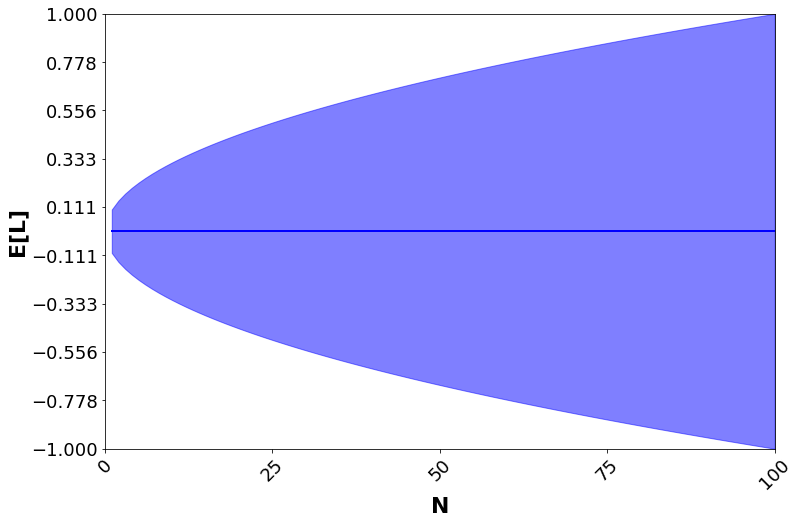

In [8]:
#1. parameters opnieuw instellen
l=0.1     # stapgrootte in willekeurige eenheden
min_N=1   # minimaal aantal stappen
max_N=100 # maximaal aantal stappen
numN=max_N-min_N+1 # aantal stappen
p=0.5     # kans stap rechts
q=1.0-p   # kans stap links

#2. curves bepalen
Ncoord=np.linspace(min_N,max_N,numN)
E_L=np.zeros(numN)     # gemiddelde n1
Var_L=np.zeros(numN)   # variantie n1
for iN in range(numN):
    N=iN+min_N
    E_L[iN]=N*(p-q)*l
    Var_L[iN]=4.0*N*p*q*(l**2)
    
#3. Mooi plotten
plt.figure(figsize=(12,8))

#variantie omzetten in 2sigma range
SigLow=np.zeros(numN)
SigHigh=np.zeros(numN)
for iN in range(numN):
    N=iN+min_N
    sig2=np.sqrt(Var_L[iN])
    SigLow[iN]=E_L[iN]-sig2
    SigHigh[iN]=E_L[iN]+sig2
    
plt.fill_between(Ncoord, SigLow, SigHigh, color='blue', zorder=0, alpha=.5)
plt.plot(Ncoord, E_L,  color='blue',linewidth=2, zorder=0)

# Assen opmaken 
min_L=np.min(SigLow)
max_L=max(SigHigh)
plt.axis([min_N,max_N,min_L,max_L])
Xlst=np.linspace(0,max_N,5)
plt.xticks(Xlst,rotation=45,fontsize=18)
Ylst=np.linspace(min_L,max_L,10)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("N",fontsize=22,fontweight="bold")
plt.ylabel("E[L]",fontsize=22,fontweight="bold")
# En alles op het scherm plotten
plt.show()